<a href="https://colab.research.google.com/github/yashyaks/ML-Playground/blob/main/ML2/ML2_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implement backpropagation algorithm from scratch.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

X=data.data
y=data.target

In [3]:
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [5]:
learning_rate = 0.1
iterations = 5000
N = y_train.size

input_size = 4

hidden_size = 2

output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

In [6]:
np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [8]:
for itr in range(iterations):

    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

Streaming output truncated to the last 5000 lines.
<ipython-input-8-edee198bdff1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
<ipython-input-8-edee198bdff1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
<ipython-input-8-edee198bdff1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
<ipython-input-8-edee198bdff1>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignor

<Axes: title={'center': 'Mean Squared Error'}>

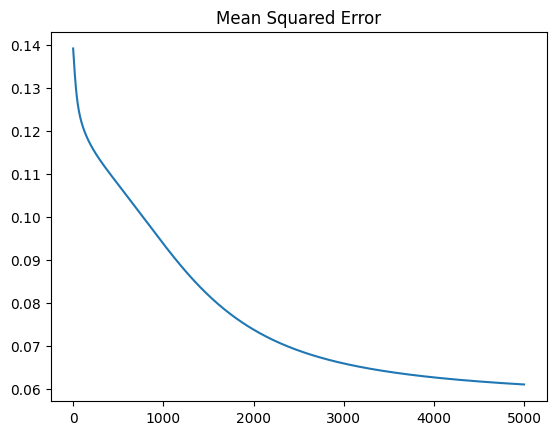

In [9]:
results.mse.plot(title="Mean Squared Error")

### Task

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')  # You can choose a different architecture
])



In [13]:
learning_rate = 0.01
epochs = 100
loss_history = []


In [14]:
for epoch in range(epochs):
    for i in range(len(X)):
        with tf.GradientTape() as tape:
            Y_pred = model(X[i:i+1])
            error = Y[i:i+1] - Y_pred
            loss = tf.reduce_mean(tf.square(error))

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer = tf.optimizers.SGD(learning_rate)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        loss_history.append(loss)


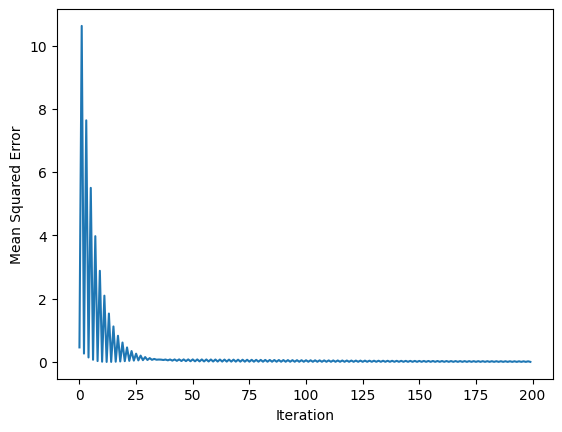

In [15]:
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.show()



### Iris Dataset

In [17]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [19]:
X = (X - X.mean()) / X.std()
y_one_hot = np.zeros((y.shape[0], 3))
y_one_hot[np.arange(y.shape[0]), y] = 1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [22]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=0)


In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Final Loss: {loss}, Final Accuracy: {accuracy}')

1/1 [==============================] - 0s 35ms/step - loss: 0.3731 - accuracy: 0.9667
Final Loss: 0.37307044863700867, Final Accuracy: 0.9666666388511658
